<h3> Basic Statistics </h3>
References
https://docs.python.org/3/library/statistics.html#statistics.stdev

https://docs.scipy.org/doc/numpy-1.13.0/index.html

http://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm


In [10]:
import statistics
import math
import numpy as np
import matplotlib.pyplot as plt

<h3> Variance </h3> 
Variance is a measure of the variability (spread or dispersion) of data. A large variance indicates that the data is spread out; a small variance indicates it is clustered closely around the mean. The variance of $n$ data points with mean $\mu$ is given by:

$$\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n-1}$$

<h3> Standard Deviation ($\sigma$) </h3> 
It is square root of variance.


In [3]:
#using numpy
X = np.random.randint(50, size=10)
#X = np.array([21, 36, 17, 16, 24, 30, 39, 39, 42, 42])
print (X)
Xm = np.mean(X)
print (Xm)
var = 0.0
for i in range(10):
    var = var + (X[i]-Xm)*(X[i]-Xm)
var = var/9.0
print (var)    

print (np.var(X, ddof=1))
print(np.std(X,ddof=1), np.sqrt(np.var(X,ddof=1)))

[ 8 30 28 43 19 15 48 37 19 11]
25.8
186.844444444
186.844444444
13.6691054735 13.6691054735


### Chebyshev's inequality
There are no more than $1/k^2$ of a given distribution that are more than $k$ standard deviations away from the mean.


In [4]:
X = np.random.randint(100, size=20)
print (X)
xm = np.mean(X)
k = np.sqrt(2)
#k = 1.2
dist = k*np.std(X,ddof=1) # k standard deviation
val_out = [x for x in X if abs(x - xm) >= dist]
print ('Number of values greater than ', k, 'standard deviations away from the mean:', val_out)
print ('Chebyshev\'s inequality hold for X:', float(len(val_out))/len(X), '<', 1/k**2)

[21 73 86 91 12 53 21  2 64 72 83  9 21 55 39 91 98 65  8 14]
Number of values greater than  1.41421356237 standard deviations away from the mean: [2, 98]
Chebyshev's inequality hold for X: 0.1 < 0.5


Exercise 1: Another way to look at the Chebyshev's inequality is to state the there are at least $1 - 1/k^2$ distribution values lies within “plus or minus” k standard deviations σ of the mean µ. For a randomly generated data of size 1000 as in the earlier experiment, show that 75% of the randomly generated values lie within “plus or minus” two standard deviations σ of the mean µ. 

<h3> Covariance </h3>
Covariance of two random variables measure how the two variables move together. If they move in the same direction the covariance is positive and if they move in opposite direction the covariance is negative. 

$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

In [5]:
X = np.array([0.1, 0.3, 0.4, 0.8, 0.9])
Y = np.array([1.2, 2.4, 2.6, 3.0, 5.5])
Xm = np.mean(X)
Ym = np.mean(Y)
s = 0.0
for i in range(5):
    s = s+ (X[i]-Xm)*(Y[i]-Ym)
cov_xy = s/4.0
print (cov_xy)    

              

0.47


In [6]:
X = np.array([0.1, 0.3, 0.4, 0.8, 0.9])
Y = np.array([5.5,  3.0, 2.6,  2.4, 1.2])
Xm = np.mean(X)
Ym = np.mean(Y)
s = 0.0
for i in range(5):
    s = s+ (X[i]-Xm)*(Y[i]-Ym)
cov_xy = s/4.0
print (cov_xy)    

-0.465


<h3> Covariance Matrix </h3>

\begin{matrix}
  cov_{x,x} & cov_{x,y} \\
  cov_{y,x} & cov_{y,y}
 \end{matrix}

In [7]:
#cov(x,x)
cov_xx = np.var(X,ddof=1) # div by N-ddof
#cov(y,y)
cov_yy = np.var(Y,ddof=1)
#cov(y,x) = cov(x,y)
cov_yx = cov_xy
cov_mat = [[ cov_xx,  cov_xy ],[ cov_yx,   cov_yy]]
print (cov_mat)

[[0.11500000000000002, -0.46500000000000008], [-0.46500000000000008, 2.4979999999999998]]


In [8]:
# using numpy
D = np.array([ [0.1, 0.3, 0.4, 0.8, 0.9],
               [5.5,  3.0, 2.6,  2.4, 1.2]
             ])
print( np.cov(D, ddof=1))
print( np.cov(D))  # default is unbiased
print( np.cov(D)[0,1])

[[ 0.115 -0.465]
 [-0.465  2.498]]
[[ 0.115 -0.465]
 [-0.465  2.498]]
-0.465


<h3> Coorelation </h3>

Coorelation is obtained by normalizing covariance by the standard deviation. This is particularly useful when the variables ($x$ and $y$) are on different scales.

$\rho = \frac{cov_{x,y}}{\sigma_x \sigma_y}$

In [11]:
stdx  = math.sqrt(cov_xx)
stdy  = math.sqrt(cov_yy)
corr_xy = cov_xy/(stdx*stdy)
corr_yx = corr_xy
print (corr_xy)
corr_xx = cov_xx/(stdx*stdx)
corr_yy = cov_yy/(stdy*stdy)
print (corr_xx, corr_yy)
corr_mat = [[ corr_xx,  corr_xy ],[ corr_yx,   corr_yy]]
print (corr_mat)

-0.867576571726
1.0 1.0
[[0.99999999999999989, -0.86757657172608438], [-0.86757657172608438, 1.0]]


In [12]:
# using numpy
D = np.array([ [0.1, 0.3, 0.4, 0.8, 0.9],
               [5.5,  3.0, 2.6,  2.4, 1.2]
             ])
print( np.corrcoef(D) )  

[[ 1.         -0.86757657]
 [-0.86757657  1.        ]]


#### Example Random Data

Correlation:  -0.151332455287
Correlation using corrcoeff:  -0.148305806181


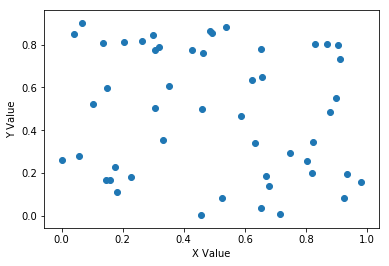

In [13]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

# we use only one off-diagonal entry from the matrix 
print ('Correlation: ', np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y)) )
#  using corrcoef function
print ('Correlation using corrcoeff: ', np.corrcoef(X, Y)[0, 1]) 
plt.show()

Correlation using corrcoeff:  0.94662945528


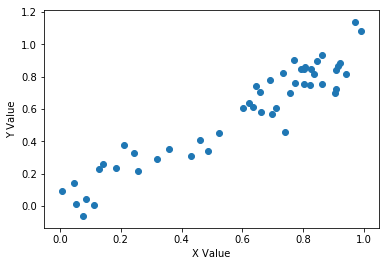

In [14]:
# generate correlated data
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
print ('Correlation using corrcoeff: ', np.corrcoef(X, Y)[0, 1]) 
plt.show()

Correlation using corrcoeff:  0.792922582647


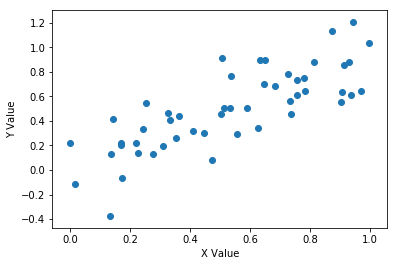

In [15]:
# less coorelated (add more noise)
X = np.random.rand(50)
Y = X + np.random.normal(0, .2, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
print ('Correlation using corrcoeff: ', np.corrcoef(X, Y)[0, 1]) 
plt.show()

Exercise 2 (Take Home): Correlation is heavily used in the finance industry. One use is in building a portfolio with reduced risk. This is typically accomplished by having uncorrelated stocks in the portfolio. Another use is to identify a pair of stocks that are correlated and use it to predict stock price. In this exercise, we will compute correlation coefficient between two stocks. Get daily historical data for last two years years for AAPL and SPY from the yahoo finance site: https://finance.yahoo.com/ (At the yahoo finance site search for a stock symbol and you will see links for historical data). Download the historical finance data for two stocks and save it into two separate  csv files. Write Python code to read the adjusted price of the two stocks from csv files, compute correlation coefficient, and plot a scatter-plot of the returns.

Note that a simple return $r_i$ for an asset at time $t_i$ for one unit of time is given by:
\begin{equation*}
r_i = \frac{S_i - S_{i-1}}{S_{i-1}}
\end{equation*}
Where $S_{i-1}$ and $S_i$  be the price of a stock at time $t_{i-1}$ and $t_i$ respectively.

### Probability Distribution - Normal Distribution
A random variable $X \sim \mathcal{N}(\mu,\,\sigma^{2})$ is said to be normally distributed with parameter $\mu$ and $\sigma^2$ if its density is given by

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$
The normal density function is a bell shaped curve that is symmetric about $\mu$. In practice, many random phenomena have a normal probability distribution.


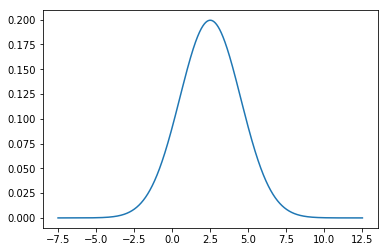

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot between mu-5*sigma and mu+5*sigma with .001 steps.
mu = 2.5
sigma =2.0
x_axis = np.arange(mu-5*sigma, mu+5*sigma, 0.001)

plt.plot(x_axis, norm.pdf(x_axis,mu,sigma))
plt.show()

<h3> Estimate largest catch </h3>

<a href='https://youtu.be/eOMZtBacarY?t=1734' > BBC Video </a>


Average number of fish a day = 200

Total number of fish in 40 year:

40 years * 8 weeks during the year = 320

320 * 6 days of the week = 1920

1920 * 200 = 384,000 fish caught in his whole career.


Average weight of a fish on the observation day = 220 g
Standard Deviation based on the observation day =  238 g


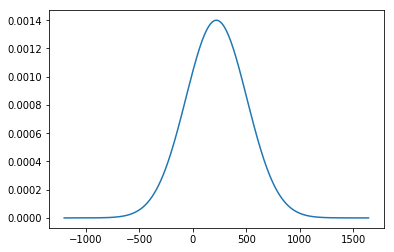

In [17]:
# Plot between mu-5*sigma and mu+5*sigma with .001 steps.
mu = 220
sigma =285
x_axis = np.arange(mu-5*sigma, mu+5*sigma, 0.001)

plt.plot(x_axis, norm.pdf(x_axis,mu,sigma))
plt.show()

In [18]:
from scipy.stats import norm
prl = norm(220, 238).cdf(1300) # P(W <= 1300)
prg = 1 - prl # P(W > 1300)
print (prg*384000)
# given probability you can use the inverse function
pr = 1.0 - 1.0/384000
norm.ppf(pr, loc=220, scale=238)

1.09132907038


1304.3794508860069

In [19]:
prl = norm(220, 238).cdf(1300) # P(W <= 1300)
prg = 1 - prl # P(W > 1300)
print (prg*384000)

1.09132907038


Exercise 3: Generate 1000 samples from a normal distribution using numpy (see np.random.normal()) with mu = 2 and sigma = 1.0. Plot the histogram along with the normal pdf plot to show the fit along with each plot. 

Skewed Distribution: A distribution is skewed if one of its tails is longer than the other. A negatively skewed distribution is one when tail on the negative distribution is longer. On the other hand a positively skewed distribution is when the tail on the positive direction is longer. 

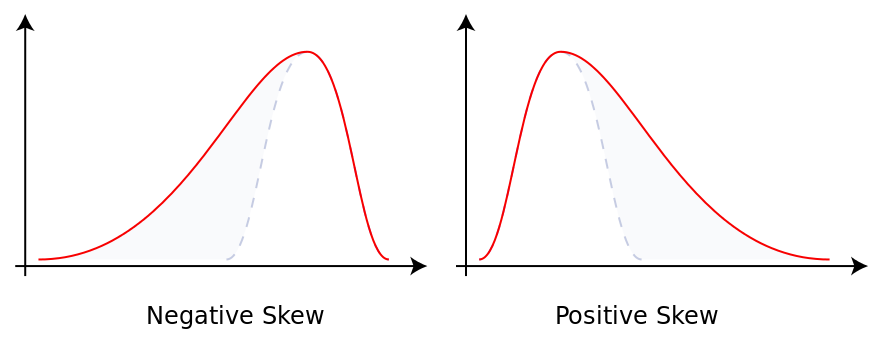



Most asset return distributions are skewed.

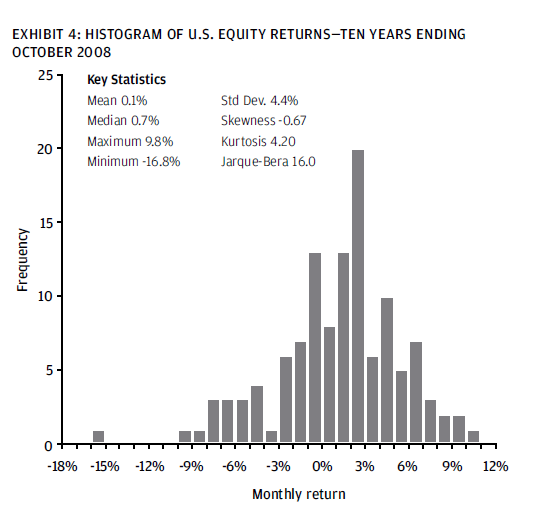

In [20]:
import scipy.stats as stats

In [21]:
my_data = np.genfromtxt('resources/GSPC.csv', skip_header=1,delimiter=',')

In [22]:
np.shape(my_data)

(1260, 7)

In [23]:
price = my_data[:,5]

In [24]:
price

array([ 1461.890015,  1457.150024,  1461.02002 , ...,  2713.060059,
        2723.98999 ,  2743.149902])

In [25]:
returns = (price[1:] - price[:1259])/price[:1259]

In [26]:
np.shape(returns)

(1259,)

In [27]:
print ('Skew:', stats.skew(returns))
print ('Mean:', np.mean(returns))
print ('Median:', np.median(returns))

plt.hist(returns, 30);

Skew: -0.38831219986319604
Mean: 0.000527928436527
Median: 0.0005452557699


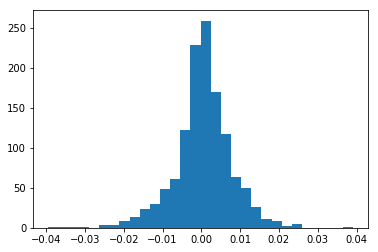

In [28]:
plt.show()

In [29]:
# jarque bera test whether sample data have the skewness and kurtosis matching a normal distribution
# Samples from a normal distribution have an expected skewness of 0 and an expected excess kurtosis of 0
_, pvalue = stats.jarque_bera(returns)  # testing normality

In [30]:
pvalue  # typical pvalue > 0.05 indicates likely normal, works  for number of samples > 2000

0.0

In [33]:
# another normality test
_, pvalue = stats.kstest(returns, 'norm')

In [34]:
pvalue

0.0

In [35]:
x = np.random.normal(0, 1, 10000)
_, pvalue = stats.jarque_bera(x)
print(pvalue) # > 0.05 most likely normal

0.458153089595


In [37]:
# another normality test
_, pvalue = stats.kstest(x, 'norm')
print(pvalue) # > 0.05 most likely normal

0.393535217894


In [ ]:
print ('Skew:', stats.skew(x))
print ('Kurtosis:', stats.kurtosis(x))
print ('Mean:', np.mean(x))
print ('Median:', np.median(x))


Exercise 4 (Take Home): Get daily historical data for last five years for your favourite stock from the yahoo finance site. Repeat the above process for computing returns using the adjusted closing price, plot histogram, and perform Jarque-Bera test for normality. Note that the test here is on a smaller number of samples (< 2000), so it is approximate. Also, perform the KS-test.

Exercise 5 (Take Home): Perform the Jarque-Bera and KS-test on the data1999 and data2012  from 'Introduction to Numpy -II' notebook.